## Семинар 5

# Тема: Масштабирование (нормализация) данных. Применение конвейера.

Нормализация признаков - приведение признаков к одному масштабу. Нормализация признаков относится к методам предобработки данных. Её необходимо производить в связи с тем, что многие алгоритмы машинного обучения лучше работают, когда все признаки имеют одну шкалу измерения. Деревья и леса представляют собой два алгоритма из очень немногих, где не нужно масштабировать данные. Для таких алгоритмов, которые работают независимо от масштаба признаков, хуже от нормализации обычно не становится. Нормализация применяется только к числовым признакам. Существует целый ряд методов шкалирования. Рассмотрим некоторые из них.

## minmax нормализация

`minmax` нормализация приводит каждый признак к значению между 0 и 1 или от a до b.  
Признак `x` трансформируется по формуле: $${x_i}^{norm} := \frac{x_i - x_{min}}{x_{max} - x_{min}}$$

$${x_i}^{norm} := a+\frac{(x_i - x_{min})(b-a)}{x_{max} - x_{min}}$$

Класс `MinMaxScale`из библиотеки `sklearn` имеет метод `fit` для вычисления минимального ($x_{min}$) и максимального ($x_{max}$) значения признака, а метод `transform` преобразует признак по формуле. Можно выполнить обе этих операции сразу так `fit_transform`:

`from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))# по умолчанию диапазон от 0 до 1
scaler.fit_transform(X_train)
scaler.transform(X_test)`

## std нормализация (стандартная нормализация)

`std` нормализация приводит каждый признак к виду нормального распределения, когда он имеет среднее значение 0 и стандартное отклонение 1.  
Признак `x` трансформируется по формуле: $${x_i}^{st} := \frac{x_i - x_{mean}}{x_{std}}$$

Класс `StandardScaler`из библиотеки `sklearn` имеет метод `fit` для вычисления среднего значения ($x_{mean}$) признака и его стандартного отклонения ($x_{std}$), а метод `transform` преобразует признак по формуле. Можно выполнить обе этих операции сразу так `fit_transform`:

`from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)`

Нормализация min-max предпочтительна, когда данные не соответствуют гауссовскому (нормальному) распределению. Нормализация min-max предпочтительна для алгоритмов, которые не следуют какому-либо распределению. Обратите внимание, что на min-max нормализацию влияют выбросы.

С другой стороны, стандартная нормализация может быть полезна в тех случаях, когда данные подчиняются распределению Гаусса. Однако это не обязательно. Кроме того, в отличие от min-max нормализации, стандартная нормализация не имеет ограничивающего диапазона. Это означает, что даже если в данных есть выбросы, стандартизация на них не повлияет.

### Применение конвейера

Класс Pipeline позволяет писать более лаконичный код и уменьшает вероятность ошибок, которые могут быть допущены при построении цепочек операций без использования класса Pipeline (например, мы можем забыть применить все преобразования к тестовому набору или можем применить их в неправильном порядке).

Класс make_pipeline - конвейер c автоматическим присваиванием имени каждому этапу.

Импортируем необходимые библиотеки:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

### Задание: 
Загрузите данные о заболевании диабетом. Масштабируйте их при помощи min-max нормализации. Обучите модель линейной регрессии на этих данных. Выведите коэффициенты гиперплоскости и метрики качества. Проделайте то же самое, используя конвейер.

Загружаем данные:

In [8]:
diabetes =load_diabetes()
X=diabetes.data
y=diabetes.target
df = pd.DataFrame(X, columns = diabetes.feature_names)
df['y'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разделяем на обучающую и тестовую выборки:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Масштабируем обучающие и тестовые данные:

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучаем модель на масштабированных данных:

In [11]:
model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

LinearRegression()

Выводим коэффициенты:

In [12]:
model_linreg.coef_

array([  -9.42905024,  -19.89039971,  154.77853961,   74.03941014,
       -147.22209812,   82.18680495,   -2.51359979,   35.56367877,
        182.61282974,    7.75023385])

In [13]:
model_linreg.intercept_

8.133812537354288

Делаем предсказание на тестовых данных:

In [14]:
y_test_pred = model_linreg.predict(X_test_scaled)

Вычислим коэффициент детерминации:

In [15]:
r2 = metrics.r2_score(y_test,y_test_pred)
r2

0.35940880381777107

In [18]:
RMSE = metrics.mean_squared_error(y_test,y_test_pred) ** 0,5
RMSE

(1.0, 5)

### Испортируем класс Pipeline.

Задаем названия и создаем объекты используемых классов.

In [19]:
pipe = Pipeline(steps = [('scaler', MinMaxScaler()),
                         ('lr', LinearRegression())])

Шаги конвейера:

In [20]:
pipe.steps

[('scaler', MinMaxScaler()), ('lr', LinearRegression())]

Обучаем модель:

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LinearRegression())])

Выводим коэффициенты:

In [22]:
pipe.named_steps['lr'].intercept_

8.133812537354288

In [23]:
pipe.named_steps['lr'].coef_

array([  -9.42905024,  -19.89039971,  154.77853961,   74.03941014,
       -147.22209812,   82.18680495,   -2.51359979,   35.56367877,
        182.61282974,    7.75023385])

Сделаем предсказание на тестовых данных. Вычислим метрики:

In [24]:
y_test_pred=pipe.named_steps['lr'].predict(pipe.named_steps['scaler'].transform(X_test))

In [25]:
r2 = metrics.r2_score(y_test,y_test_pred)
r2

0.35940880381777107

In [27]:
RMSE = metrics.mean_squared_error(y_test,y_test_pred) ** 0,5
RMSE

(1.0, 5)

### 1. Загрузите встроенные данные о показателе медианной стоимости дома в округах Калифорнии. Выведите описание датасета. Обозначьте за _X_ данные, а за _y_ целевую переменную. Выведите их размеры.

In [36]:
houses = fetch_california_housing()
print(houses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [37]:
X = houses.data
y = houses.target

In [38]:
X.shape

(20640, 8)

In [39]:
y.shape

(20640,)

### 2. Разделите данные на обучающую и тестовую части. Выведите их размеры. 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [47]:
X_train.shape[0]

15480

In [48]:
X_test.shape[0]

5160

### 3. Постройте модель линейной регрессии для предсказания медианной стоимости дома в округах Калифорнии. Выведите, полученные коэффициенты  гиперплоскости. Сделайте предсказание на тестовых данных. Вычислите метрики: коэффициент детерминации и ошибка RMSE. Сделайте вывод о качестве работы модели линейной регрессии для этих данных. 

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
coefficients = lr.coef_
intercept = lr.intercept_
y_pred = lr.predict(X_test)

In [59]:
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [60]:
r2

0.5911695436410476

In [61]:
rmse

0.7351277481981683

### 4. Напишите своими руками функцию MinMaxScaler_fit, которая принимает матрицу признаков, а возвращает массив минимальных значений по каждому признаку и массив максимальных значений по каждому признаку. Примените её к обучающим данным.

In [62]:
def MinMaxScaler_fit(X):
    min_values = np.min(X, axis=0)
    max_values = np.max(X, axis=0)
    return min_values, max_values

In [63]:
min_values, max_values = MinMaxScaler_fit(X_train)

In [64]:
min_values

array([   0.4999    ,    1.        ,    0.84615385,    0.33333333,
          3.        ,    0.75      ,   32.54      , -124.35      ])

In [65]:
max_values

array([ 1.50001000e+01,  5.20000000e+01,  1.41909091e+02,  3.40666667e+01,
        3.56820000e+04,  5.99714286e+02,  4.19500000e+01, -1.14310000e+02])

### 5. Напишите своими руками функцию _MinMaxScaler_transform_, которая принимает матрицу признаков, а также numpy-массивы минимальных и максимальных значений и возвращает масштабированные признаки. Масштабируйте обучающие и тестовые данные при помощи этой функции. 
Указание: ${x_i}^{norm} := \frac{x_i - x_{min}}{x_{max} - x_{min}}$. Примените эту функцию к обучающим и тестовым данным, передав в неё массивы минимальных и максимальных значений обучающих данных.

In [79]:
def _MinMaxScaler_transform_(X, min_values, max_values):
    scaled_X = (X - min_values) / (max_values - min_values)
    return scaled_X

In [82]:
X_train_scaled = _MinMaxScaler_transform_(X_train, min_values, max_values)
X_test_scaled = _MinMaxScaler_transform_(X_test, min_values, max_values)

In [84]:
pd.DataFrame(X_train_scaled, columns=houses.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.468987,0.352941,0.050442,0.023842,0.053897,0.003893,0.629118,0.166335
1,0.376188,0.333333,0.040416,0.022813,0.015247,0.002506,0.043571,0.708167
2,0.187073,0.352941,0.030918,0.026195,0.008717,0.003693,0.227418,0.605578
3,0.447794,0.235294,0.039574,0.019763,0.003279,0.003518,0.103082,0.714143
4,0.139053,0.392157,0.025401,0.020850,0.048544,0.002684,0.646121,0.292829
...,...,...,...,...,...,...,...,...
15475,0.269831,0.372549,0.036536,0.021116,0.019872,0.004176,0.608927,0.307769
15476,0.166453,0.509804,0.031923,0.017777,0.018050,0.003916,0.524973,0.344622
15477,0.186053,0.588235,0.019814,0.018028,0.019647,0.001739,0.429330,0.244024
15478,0.353899,0.647059,0.026190,0.021663,0.029401,0.002501,0.114772,0.639442


In [85]:
pd.DataFrame(X_test_scaled, columns=houses.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.251852,0.411765,0.034147,0.022000,0.043387,0.005728,0.004251,0.727092
1,0.364112,0.607843,0.037296,0.017621,0.036240,0.003792,0.146652,0.635458
2,0.265431,0.549020,0.036045,0.020540,0.043471,0.003606,0.649309,0.250000
3,0.134564,0.705882,0.029397,0.029157,0.010847,0.003333,0.070138,0.871514
4,0.310685,0.470588,0.024621,0.020936,0.018106,0.001607,0.557917,0.191235
...,...,...,...,...,...,...,...,...
5155,0.244941,0.137255,0.037963,0.021215,0.168138,0.004663,0.629118,0.285857
5156,0.050496,0.666667,0.015710,0.024896,0.022899,0.001411,0.130712,0.613546
5157,0.215838,0.294118,0.019642,0.019264,0.025029,0.001897,0.176408,0.571713
5158,0.345747,0.705882,0.026563,0.016497,0.009866,0.003771,0.144527,0.598606


### 6. Убедитесь, что у масштабированных обучающих данных минимальное значение стало равно 0, а максимальное 1. А у масштабированных тестовых данных минимальное значение стало близко к 0, а максимальное близко к 1.

In [86]:
np.round(np.min(X_train_scaled, axis=0)), np.round(np.max(X_train_scaled, axis=0))

(array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

In [87]:
np.round(np.min(X_test_scaled, axis=0)), np.round(np.max(X_test_scaled, axis=0))

(array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.]),
 array([1., 1., 0., 0., 0., 2., 1., 1.]))

In [89]:
pd.DataFrame(X_train_scaled, columns=houses.feature_names).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,0.232738,0.541750,0.032513,0.022602,0.039891,0.003820,0.328068,0.476480
std,0.130664,0.247055,0.017962,0.014615,0.032078,0.011102,0.227229,0.199816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142753,0.333333,0.025577,0.019933,0.021918,0.002802,0.147715,0.253984
50%,0.210338,0.549020,0.031107,0.021204,0.032624,0.003453,0.181722,0.583665
75%,0.293106,0.705882,0.036926,0.022727,0.048236,0.004228,0.549416,0.632470
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7. Осуществите масштабирование признаков методом min-max при помощи библиотечной функции.
Указание: Создайте объект класса [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Примените к нему метод _fit_, передав в него обучающие данные, он рассчитает минимальное и максимальное значение каждого из столбцов обучающих данных. Их можно посмотреть через соответствующие атрибуты: _data_min__ и _data_max__.  Далее при помощи метода _transform_ преобразуйте обучающие и тестовые данные. Убедитесь, что они будут теми же, что и при шкалировании вручную. Для обучающих данных можно сразу применять метод _fit_transform_.

### 8. Изобразите гистограммы признаков до и после min-max масштабирования.

### 9. Обучите модель линейной регрессии для предсказания медианной стоимости дома в округах Калифорнии на масштабированных данных методом min-max. Выведите полученные коэффициенты  гиперплоскости. Напечатайте рядом название признака и соответствующий ему вес. Сделайте вывод о значимости признаков. 

### 10. Сделайте предсказание на тестовых данных. Вычислите метрики: коэффициент детерминации и ошибка RMSE. Убедитесь, что значения метрик практически те же, что и при обучении модели на не масштабированных данных.

### 11. Напишите своими руками функцию _StandardScaler_fit_, которая принимает матрицу признаков, а возвращает массив средних значений по каждому признаку и массив стандартных отклонений по каждому признаку. Примените её к обучающим данным.

### 12. Напишите своими руками функцию _StandardScaler_transform_, которая принимает матрицу признаков, а также numpy-массивы средних значений и стандартных отклонений и возвращает стандартизированные признаки. Стандартизируйте обучающие и тестовые данные. 
Указание: ${x_i}^{norm} := \frac{x_i - x_{mean}}{x_{std}}$. Примените эту функцию к обучающим и тестовым данным, передав в неё массивы средних значений и стандартных отклонений обучающих данных.

In [137]:
def _StandardScaler_transform_(X, mean=None, std=None):
    if mean is None or std is None:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        
    standardized_X = (X - mean) / std
    return standardized_X, mean, std

In [138]:
X_train_standardized, mean_train, std_train = _StandardScaler_transform_(X_train)
X_test_standardized, _, _ = _StandardScaler_transform_(X_test, mean=mean_train, std=std_train)

In [145]:
X_train_standardized

array([[ 1.80812234, -0.76426232,  0.99820721, ...,  0.00657932,
         1.32491944, -1.55220631],
       [ 1.09789119, -0.84363104,  0.44000463, ..., -0.1183325 ,
        -1.25207048,  1.15953974],
       [-0.34948981, -0.76426232, -0.08879461, ..., -0.01136792,
        -0.44296112,  0.64610253],
       ...,
       [-0.35730151,  0.18816232, -0.70701041, ..., -0.18746503,
         0.44565609, -1.16338978],
       [ 0.92730059,  0.42626848, -0.3520338 , ..., -0.11880858,
        -0.93871598,  0.81558666],
       [-1.31238718, -1.0817372 , -0.59321731, ...,  0.05991481,
        -1.32222447,  1.99699073]])

In [146]:
X_test_standardized

array([[ 0.14628912, -0.52615616,  0.09099757, ...,  0.1718598 ,
        -1.42511699,  1.25425146],
       [ 1.00547035,  0.26753104,  0.26630121, ..., -0.00253763,
        -0.798408  ,  0.79564735],
       [ 0.25021637,  0.02942488,  0.1966324 , ..., -0.01921117,
         1.41378116, -1.13348082],
       ...,
       [-0.12933715, -1.00236848, -0.71663271, ..., -0.17318266,
        -0.66745389,  0.4766184 ],
       [ 0.86491257,  0.66437464, -0.33126431, ..., -0.00441821,
        -0.80776187,  0.61120874],
       [ 0.46936617,  0.58500592, -0.06737429, ..., -0.01991167,
         0.95076483, -1.43257046]])

### 13. Убедитесь, что у стандартизированных обучающих данных среднее значение стало равно 0, а стандартное отклонение равно 1. А у масштабированных тестовых данных среднее значение стало близко к 0, а стандартное отклонение близко к 1.

In [139]:
train_mean = np.mean(X_train_standardized)
train_std = np.std(X_train_standardized)

In [140]:
np.round(train_mean)

-0.0

In [141]:
np.round(train_std)

1.0

In [142]:
test_mean = np.mean(X_test_standardized)
test_std = np.std(X_test_standardized)

In [143]:
np.round(test_mean)

0.0

In [144]:
np.round(test_std)

1.0

### 14. Осуществите стандартизацию признаков при помощи библиотечных функций.
Указание: Создайте объект класса [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Примените к нему метод _fit_, передав в него обучающие данные, он рассчитает среднее арифметическое и среднее квадратическое отклонение каждого из столбцов обучающих данных. Их можно посмотреть через соответствующие атрибуты: _mean__ и _scale__.  Далее при помощи метода _transform_ преобразуйте обучающие и тестовые данные. Убедитесь, что они будут теми же, что и при стандартизации вручную. Для обучающих данных можно сразу применять _fit_transform_.

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
scaler = StandardScaler()

In [183]:
X_train, X_test = train_test_split(X, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
train_mean = np.mean(X_train_scaled, axis=0)
train_std = np.std(X_train_scaled, axis=0)

In [185]:
np.round(train_mean)

array([-0., -0.,  0.,  0.,  0., -0.,  0., -0.])

In [186]:
np.round(train_std)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [187]:
test_mean = np.mean(X_test_scaled, axis=0)
test_std = np.std(X_test_scaled, axis=0)

In [188]:
np.round(test_mean)

array([-0.,  0., -0.,  0., -0.,  0.,  0., -0.])

In [189]:
np.round(test_std)

array([1., 1., 1., 1., 1., 3., 1., 1.])

### 15. Изобразите гистограммы признаков до и после стандартизации.

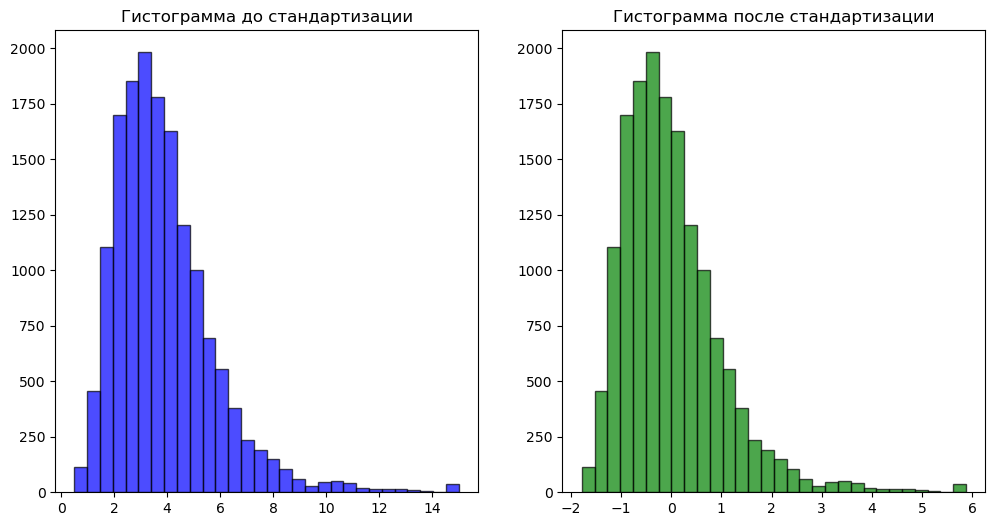

In [190]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(X_train[:, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Гистограмма до стандартизации')

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, 0], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Гистограмма после стандартизации')

plt.show()

### 16. Обучите модель линейной регрессии для предсказания медианной стоимости дома в округах Калифорнии на стандартизированных данных. Выведите полученные коэффициенты  гиперплоскости. Напечатайте рядом название признака и соответствующий ему вес. Сделайте вывод о значимости признаков. 

### 17. Обучите модель линейной регрессии на стандартизированных данных с применением конвейера, используя класс Pipeline. Выведите полученные коэффициенты гиперплоскости. 

### 18. Сделайте предсказание на тестовых данных. Вычислите метрики: коэффициент детерминации и ошибка RMSE. Убедитесь, что они получились те же, что и без применения конвейера.

### 19. Обучите модель линейной регрессии на стандартизированных данных с применением конвейера, используя класс make_pipeline. Выведите полученные коэффициенты гиперплоскости. Сделайте предсказание на тестовых данных и вычислите метрики.